# **Building an End-to-End Data Pipeline for Flight Delay Analysis: Data Cleaning, Normalization, and Insights for Airlines**


---




# Step 1: Load Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set Seaborn theme for better visuals
sns.set_theme(style="whitegrid")

# Step 2: Load and Preview Dataset

In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\ayush\Downloads\aviation_data.csv')

# Preview the dataset
print(df.to_string())


   FlightNumber DepartureDate DepartureTime ArrivalDate ArrivalTime            Airline  DelayMinutes
0        AA1234    09/01/2023      08:30 AM  09/01/2023    10:45 AM  American Airlines          15.0
1        DL5678    09/01/2023      01:15 PM  09/01/2023    03:30 PM              Delta           5.0
2        UA9101    09/01/2023      05:00 PM  09/01/2023    07:15 PM    United Airlines          25.0
3        AA1234    09/01/2023      08:30 AM  09/01/2023    10:45 PM  American Airlines          30.0
4        DL5678    09/02/2023      02:00 PM  09/02/2023    04:10 PM              Delta           NaN
5        UA9101    09/02/2023      05:00 PM  09/02/2023    07:15 PM    United Airlines          20.0
6        AA1234    09/02/2023      08:30 PM  09/03/2023    10:45 AM  American Airlines          60.0
7        DL5678    09/03/2023      01:00 PM  09/03/2023    03:30 PM              Delta          10.0
8        UA9101    09/03/2023      03:00 PM  09/03/2023    05:20 PM    United Airlines     

# Step 3: Data Cleaning
## Handle Missing Values

In [3]:
# Fill NaN values in 'DelayMinutes' with the mean delay (or you can drop them if preferred)
df['DelayMinutes'] = df['DelayMinutes'].fillna(0);

# Check for remaining missing values
print(df.isnull().sum())

FlightNumber     0
DepartureDate    0
DepartureTime    0
ArrivalDate      0
ArrivalTime      0
Airline          0
DelayMinutes     0
dtype: int64


## Remove Duplicate Flight Entries

In [4]:
# Drop duplicate rows based on all columns
df = df.drop_duplicates()

# Confirm that duplicates are removed
print(df.duplicated().sum())

0


## Correct Inconsistent Time Entries

In [5]:
# Convert 'DepartureTime' and 'ArrivalTime' to 24-hour format and combine with respective dates
df['DepartureDate'] = pd.to_datetime(df['DepartureDate'], format='%m/%d/%Y')
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate'], format='%m/%d/%Y')

df['DepartureTime'] = pd.to_datetime(df['DepartureTime'], format='%I:%M %p').dt.time
df['ArrivalTime'] = pd.to_datetime(df['ArrivalTime'], format='%I:%M %p').dt.time

# Combine date and time for departure and arrival
df['DepartureDateTime'] = df.apply(lambda row: datetime.combine(row['DepartureDate'], row['DepartureTime']), axis=1)
df['ArrivalDateTime'] = df.apply(lambda row: datetime.combine(row['ArrivalDate'], row['ArrivalTime']), axis=1)

# Fix any data where Arrival is earlier than Departure
df['FlightDuration'] = (df['ArrivalDateTime'] - df['DepartureDateTime']).dt.total_seconds() / 60

# Identify rows where FlightDuration is negative and adjust the ArrivalDate by adding 1 day
df.loc[df['FlightDuration'] < 0, 'ArrivalDateTime'] += pd.Timedelta(days=1)

# Recalculate FlightDuration after adjustment
df['FlightDuration'] = (df['ArrivalDateTime'] - df['DepartureDateTime']).dt.total_seconds() / 60

# Step 4: Data Normalization

In [6]:
# Convert dates to standard format YYYY-MM-DD
df['DepartureDate'] = df['DepartureDate'].dt.strftime('%Y-%m-%d')
df['ArrivalDate'] = df['ArrivalDate'].dt.strftime('%Y-%m-%d')

# Convert times to 24-hour format
df['DepartureTime'] = df['DepartureDateTime'].dt.strftime('%H:%M')
df['ArrivalTime'] = df['ArrivalDateTime'].dt.strftime('%H:%M')

# Drop intermediate columns if not needed
df = df.drop(columns=['DepartureDateTime', 'ArrivalDateTime'])

# Step 5: Data Analysis
## Delay Distribution Analysis

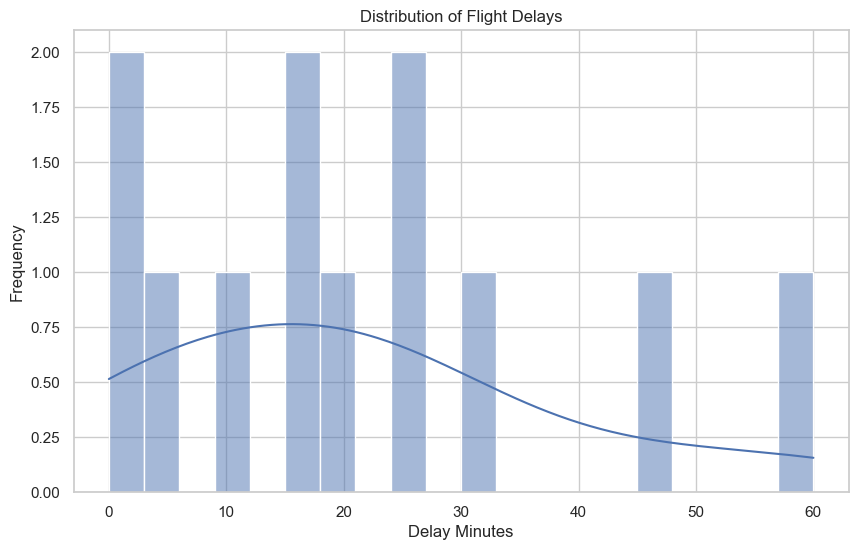

In [7]:
# Visualize the distribution of delays
plt.figure(figsize=(10, 6))
sns.histplot(df['DelayMinutes'], bins=20, kde=True)
plt.title('Distribution of Flight Delays')
plt.xlabel('Delay Minutes')
plt.ylabel('Frequency')
plt.show()

## Average Delay by Airline

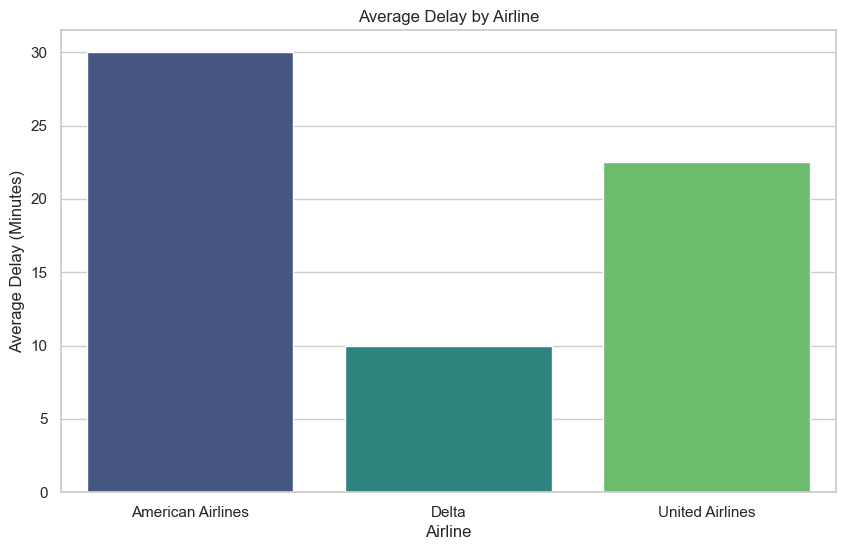

In [8]:
# Calculate the average delay for each airline
average_delay_by_airline = df.groupby('Airline')['DelayMinutes'].mean().reset_index()

# Visualize the average delay by airline
plt.figure(figsize=(10, 6))
sns.barplot(data=average_delay_by_airline, x='Airline', y='DelayMinutes', palette='viridis', hue='Airline', legend=False)
plt.title('Average Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (Minutes)')
plt.show()

## Impact of Departure Time on Delays

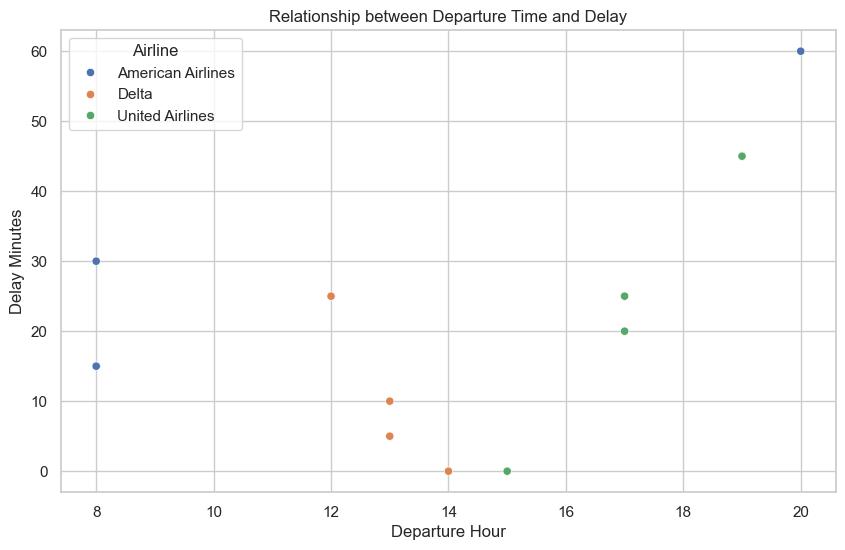

In [9]:
# Convert 'DepartureTime' to numeric value (hour of the day) for analysis
df['DepartureHour'] = pd.to_datetime(df['DepartureTime'], format='%H:%M').dt.hour

# Visualize relationship between departure time and delays
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DepartureHour', y='DelayMinutes', data=df, hue='Airline', palette='deep')
plt.title('Relationship between Departure Time and Delay')
plt.xlabel('Departure Hour')
plt.ylabel('Delay Minutes')
plt.show()

# Step 6: Save Cleaned Data

In [10]:
# Drop intermediate columns if not needed
df = df.drop(columns=['FlightDuration', 'DepartureHour'])
print(df.to_string())

#Save the cleaned and normalized dataset
df.to_csv(r'C:\Users\ayush\Downloads\cleanedAviationData.csv', index=False)

   FlightNumber DepartureDate DepartureTime ArrivalDate ArrivalTime            Airline  DelayMinutes
0        AA1234    2023-09-01         08:30  2023-09-01       10:45  American Airlines          15.0
1        DL5678    2023-09-01         13:15  2023-09-01       15:30              Delta           5.0
2        UA9101    2023-09-01         17:00  2023-09-01       19:15    United Airlines          25.0
3        AA1234    2023-09-01         08:30  2023-09-01       22:45  American Airlines          30.0
4        DL5678    2023-09-02         14:00  2023-09-02       16:10              Delta           0.0
5        UA9101    2023-09-02         17:00  2023-09-02       19:15    United Airlines          20.0
6        AA1234    2023-09-02         20:30  2023-09-03       10:45  American Airlines          60.0
7        DL5678    2023-09-03         13:00  2023-09-03       15:30              Delta          10.0
8        UA9101    2023-09-03         15:00  2023-09-03       17:20    United Airlines     


# **Key Findings and Recommendations for Flight Delay Analysis**

## **Key Findings:**

1. **Flight Delay Distribution**:
   - Most flights experience moderate delays, with the majority falling under 30 minutes.
   - Some flights, particularly from specific airlines, show significant delays, with outliers beyond 60 minutes.

2. **Airline Performance**:
   - **American Airlines** has the highest average delay time across all flights.
   - **Delta Airlines** and **United Airlines** perform relatively better, but delays are still observed, particularly during peak hours.

3. **Impact of Departure Time**:
   - Flights departing later in the day (after 5 PM) tend to have longer delays. This trend is consistent across all airlines.
   - Morning flights are more punctual, likely benefiting from less air traffic and fewer operational issues at airports.

4. **Data Issues**:
   - Duplicate flight entries were found for American Airlines, particularly on certain dates, which could distort the analysis.
   - Inconsistent time entries (e.g., flights arriving earlier than their departure times) were identified and corrected, likely arising from data entry errors.



## **Recommendations:**



1.   **Analyze Frequent Delays**: Airlines should investigate why specific flights, like AA1234, consistently face delays. It could be due to scheduling issues, ground operations, or external factors like air traffic control.

2.   **Improve Ground Operations**: Minimizing turnaround times and enhancing coordination between ground staff can reduce delays, especially for frequent flights.

3.   **Scheduling Adjustments**: Airlines might consider revising flight schedules to account for peak airport traffic times, which could lead to frequent delays.


4.   **Real-Time Communication**: Enhancing communication with passengers and ground crews in real-time could allow for smoother operations and fewer delays due to unexpected issues.


5.   **Weather Preparedness**:
Invest in advanced weather forecasting tools to better anticipate and mitigate weather-related delays.
Develop contingency plans for severe weather conditions to minimize disruptions.

6.   **Maintenance and Technical Upgrades**:
Regular and proactive maintenance checks can reduce technical delays.
Upgrading older aircraft with newer, more reliable models can improve overall punctuality.






